In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from scipy.integrate import odeint
from scipy.optimize import fixed_point, root_scalar

In [4]:
from scipy.integrate import odeint
from scipy.optimize import fixed_point
from scipy.optimize import brentq, bisect

# 1D band, varying D, solving th MF eq

In [388]:
def dXdt(X, t, v, beta, D, m_l, rho_l):
    Xm=X[2::2]
    Xp=X[3::2]
    Y=np.zeros_like(X)
    #phi=(Xp-Xm)/(Xp+Xm)
    #-(v+np.exp(-beta*phi))*Xp+v*np.roll(Xp, 1) + X[1::2]*np.exp(beta*phi)
    for i in range(1, L-1):
        npi=X[2*i]
        npi_m1=X[2*(i-1)]
        nmi=X[2*i+1]
        nmi_p1=X[2*i+3]
        phi=(npi-nmi)/(npi+nmi)
        
        Y[2*i]=-(D+v+np.exp(-beta*phi))*npi+(D+v)*npi_m1+nmi*np.exp(beta*phi)
        Y[2*i+1]=-(D+v+np.exp(beta*phi))*nmi+(D+v)*nmi_p1+npi*np.exp(-beta*phi)
    
    
    np0, nm0 = X[0], X[1]
    m0=np0-nm0
    r0=np0+nm0
    Y[0]=-(D+v)*np0 - np0*np.exp(-beta*m0/r0) + (D+v)*(m_l+rho_l)/2 + nm0*np.exp(beta*m0/r0)
    Y[1]=-(D+v)*nm0 - nm0*np.exp(beta*m0/r0) + (D+v)*X[3] + np0*np.exp(-beta*m0/r0)
    
    np1, nm1 = X[-2], X[-1]
    m1=np1-nm1
    r1=np1+nm1
    
    Y[-2]=-(D+v)*np1 - np1*np.exp(-beta*m1/r1) + (D+v)*X[-4] + nm1*np.exp(beta*m1/r1)
    Y[-1]=-(D+v)*nm1 - nm1*np.exp(beta*m1/r1) + np1*np.exp(-beta*m1/r1)
    
    return(Y)

In [50]:
vec_t0=np.linspace(0, 10, 1000)

D=1
beta=2
v=1

rho0=5
rho_l=1

m_l=fixed_point(lambda x : np.tanh(beta*x), x0=0.5)
m0=-m_l*rho0

L=100

X0=np.concatenate([np.tile([(rho_l+m_l)/2,(rho_l-m_l)/2], L-1), [(rho0+m0)/2, (rho0-m0)/2]])

In [51]:
sol = odeint(dXdt, X0, vec_t0, args=(v, beta, D, m_l, rho_l))

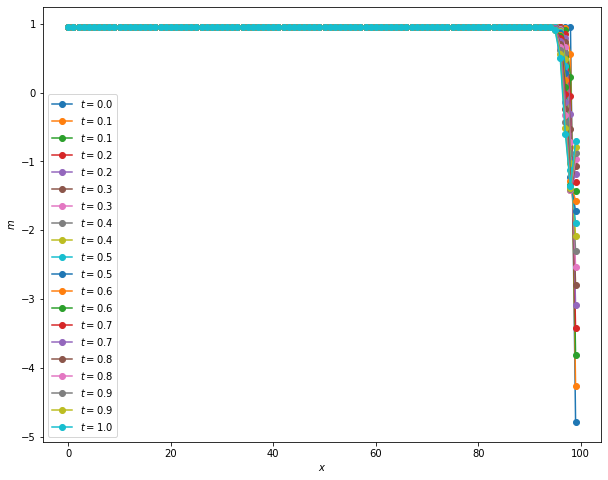

In [52]:
plt.figure(figsize=(10,8))
for t in range(0,100, 5):
    plt.plot(np.arange(L), (sol[t,0::2]-sol[t,1::2]), 'o-', 
             label=r'$t=%.1f$'%vec_t0[t])


plt.legend()
plt.xlabel(r'$x$');
plt.ylabel(r'$m$');



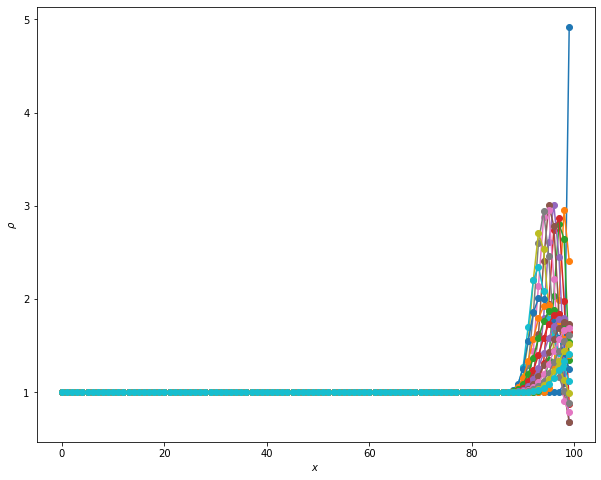

In [53]:
plt.figure(figsize=(10,8))
for t in range(1,1000, 50):
    plt.plot(np.arange(L), (sol[t,0::2]+sol[t,1::2]), 'o-', 
             label=r'$t=%.1f$'%vec_t0[t])


#plt.legend()
plt.xlabel(r'$x$');
plt.ylabel(r'$\rho$');



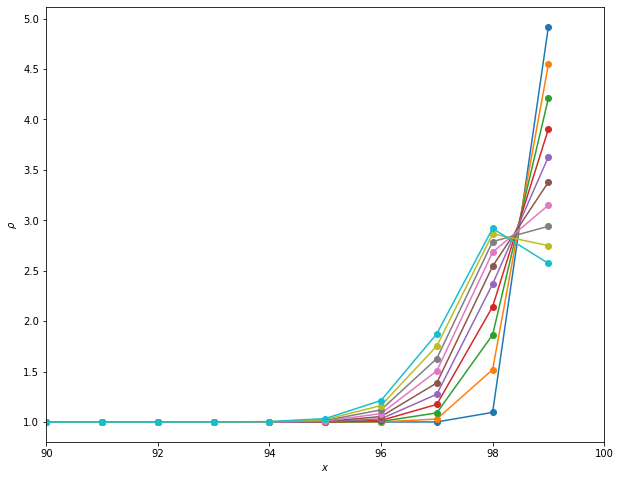

In [57]:
plt.figure(figsize=(10,8))
for t in range(1,50, 5):
    plt.plot(np.arange(L), (sol[t,0::2]+sol[t,1::2]), 'o-', 
             label=r'$t=%.1f$'%vec_t0[t])
    plt.xlim(90,100)

#plt.legend()
plt.xlabel(r'$x$');
plt.ylabel(r'$\rho$');



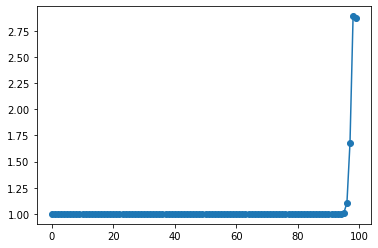

In [34]:
plt.plot(np.arange(L), (sol[76,0::2]+sol[76,1::2]), 'o-', 
             label=r'$t=%.1f$'%vec_t0[t])

(0, 10)

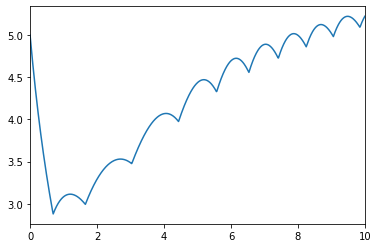

In [23]:
plt.plot(vec_t0, [np.max(sol[t,0::2]+sol[t,1::2]) for t in range(1000)], '-')
plt.xlim(0,10)

In [33]:
np.argmin([np.max(sol[t,0::2]+sol[t,1::2]) for t in range(1000)])

76

(0, 10)

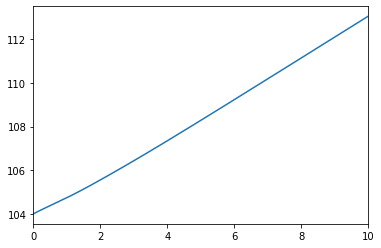

In [30]:
plt.plot(vec_t0, [np.sum(sol[t,0::2]+sol[t,1::2]) for t in range(1000)], '-')
plt.xlim(0,10)

## Get $\rho_0^c(v)$

In [390]:
def f_m0(rho0, v, beta, D, m_l, rho_l, L):
    m0=-m_l*rho0

    X0=np.concatenate([np.tile([(rho_l+m_l)/2,(rho_l-m_l)/2], L-1), [(rho0+m0)/2, (rho0-m0)/2]])

    sol = odeint(dXdt, X0, vec_t, args=(v, beta, D, m_l, rho_l))
    m0=sol[:,0]-sol[:,1]
    
    return(np.nanmin(0.1*m_l-np.abs(m0-m_l)))

In [394]:
f_m0(rho0=1, v=0.001, beta=2, D=1, m_l=fixed_point(lambda x : np.tanh(2*x), x0=0.5), rho_l=1, L=100)

0.09575040240772666

In [395]:
f_m0(rho0=20, v=0.001, beta=2, D=1, m_l=fixed_point(lambda x : np.tanh(2*x), x0=0.5), rho_l=1, L=100)

/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


-7.714069884382956

In [396]:
vec_v=np.linspace(0.001, 5, 20)
rho0c_v=[]

L=100

beta=2
D=1

rho_l=1

m_l=fixed_point(lambda x : np.tanh(beta*x), x0=0.5)

vec_t=np.linspace(0, 100, 100)

for v in vec_v: 
    res=bisect(f_m0, 0.1, 10, args=(v, beta, D, m_l, rho_l, L), xtol=1e-6, rtol=1e-6)
    rho0c_v.append(res)
    print(v, res)

/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22:

0.001 4.4277142047882085
0.26410526315789473 4.4243247509002686
0.5272105263157895 4.630486631393432
0.7903157894736842 4.887169313430787
1.0534210526315788 5.154596281051635
1.3165263157894735 5.420465421676636
1.5796315789473683 5.6804242610931395
1.842736842105263 5.933028268814087
2.1058421052631577 6.177965879440308
2.3689473684210527 6.41538815498352
2.632052631578947 6.64566330909729
2.8951578947368417 6.869216203689575
3.1582631578947367 7.0864905834198
3.4213684210526316 7.297911310195923
3.684473684210526 7.503865480422974
3.9475789473684206 7.704721307754517
4.210684210526316 7.900809240341188
4.473789473684211 8.092440843582152
4.736894736842106 8.279880475997926
5.0 8.463387775421143


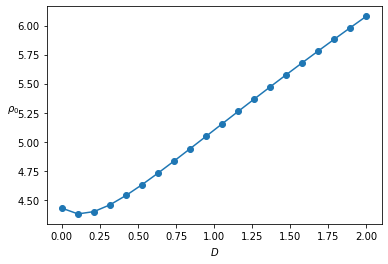

In [7]:
plt.plot(vec_D, rho0c, 'o-')
plt.xlabel(r'$D$')
plt.ylabel(r'$\rho_0$', rotation=0);

## Get $\rho_0^c(D)$

In [5]:
def f_m0(rho0, v, beta, D, m_l, rho_l, L):
    m0=-m_l*rho0

    X0=np.concatenate([np.tile([(rho_l+m_l)/2,(rho_l-m_l)/2], L-1), [(rho0+m0)/2, (rho0-m0)/2]])

    sol = odeint(dXdt, X0, vec_t, args=(v, beta, D, m_l, rho_l))
    m0=sol[:,0]-sol[:,1]
    
    return(np.nanmin(0.1*m_l-np.abs(m0-m_l)))

In [791]:
f_m0(rho0=1, v=1, beta=2, D=3, m_l=fixed_point(lambda x : np.tanh(2*x), x0=0.5), rho_l=1, L=100)

0.09575040240772688

In [793]:
f_m0(rho0=20, v=1, beta=2, D=3, m_l=fixed_point(lambda x : np.tanh(2*x), x0=0.5), rho_l=1, L=100)

0.09575040240772688

In [6]:
vec_D=np.linspace(0.001, 2, 20)
rho0c=[]

L=100

beta=2
v=1

rho_l=1

m_l=fixed_point(lambda x : np.tanh(beta*x), x0=0.5)

vec_t=np.linspace(0, 100, 100)

for D in vec_D: 
    res=bisect(f_m0, 0.1, 10, args=(v, beta, D, m_l, rho_l, L), xtol=1e-6, rtol=1e-6)
    rho0c.append(res)
    print(D, res)

/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


0.001 4.4277142047882085


/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in double_scalars
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


0.10621052631578948 4.378505754470825
0.21142105263157895 4.398493146896362


/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars


0.31663157894736843 4.457161855697633
0.4218421052631579 4.53757405281067
0.5270526315789473 4.630335569381714
0.6322631578947369 4.7302064418792735
0.7374736842105264 4.834089899063111
0.8426842105263158 4.940125989913941
0.9478947368421052 5.047106218338013
1.0531052631578945 5.154275274276733
1.1583157894736842 5.261123323440552
1.2635263157894736 5.367301034927368
1.368736842105263 5.472591257095337
1.4739473684210527 5.5768429279327405
1.579157894736842 5.679961633682251
1.6843684210526315 5.78190016746521
1.789578947368421 5.882611322402955
1.8947894736842104 5.982095098495484
2.0 6.080351495742798


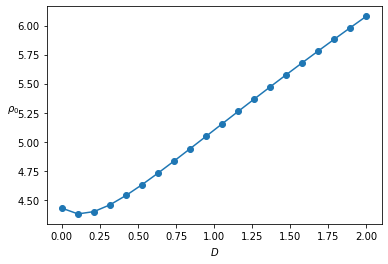

In [7]:
plt.plot(vec_D, rho0c, 'o-')
plt.xlabel(r'$D$')
plt.ylabel(r'$\rho_0$', rotation=0);

## Deduce $\rho_{min}^c$

In [8]:
def return_rhomin(rho0, v, beta, D):
    vec_t0=np.linspace(0, 10, 1000)
    rho_l=1

    m_l=fixed_point(lambda x : np.tanh(beta*x), x0=0.5)
    m0=-m_l*rho0

    L=100

    X0=np.concatenate([np.tile([(rho_l+m_l)/2,(rho_l-m_l)/2], L-1), [(rho0+m0)/2, (rho0-m0)/2]])
    
    sol = odeint(dXdt, X0, vec_t0, args=(v, beta, D, m_l, rho_l))
    
    return(np.min([np.max(sol[t,0::2]+sol[t,1::2]) for t in range(1000)]))

In [9]:
k=0
return_rhomin(rho0c[k], v, beta, vec_D[k])

2.6680412674209593

In [10]:
rhomin=[]
for k in range(len(rho0c)):
    print(vec_D[k])
    rhomin.append(return_rhomin(rho0c[k], v, beta, vec_D[k]))

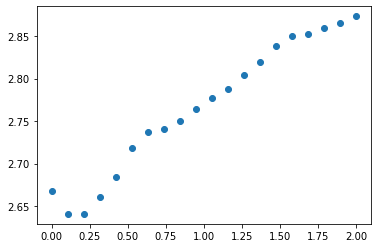

In [13]:
plt.plot(vec_D, rhomin, 'o')
#plt.plot(vec_D, rho0c, 'o')

LOW D

In [997]:
vec_D_low=np.linspace(0.001, 0.5, 20)
rho0c_low=[]

L=100

beta=2
v=1

rho_l=1

m_l=fixed_point(lambda x : np.tanh(beta*x), x0=0.5)

vec_t=np.linspace(0, 100, 100)

for D in vec_D_low: 
    res=bisect(f_m0, 0.1, 10, args=(v, beta, D, m_l, rho_l, L), xtol=1e-6, rtol=1e-6)
    rho0c_low.append(res)
    print(D, res)

/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


0.001 4.4277142047882085
0.027263157894736843 4.406452226638795
0.053526315789473686 4.391770887374878


/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in exp
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow en

0.07978947368421052 4.382726049423217
0.10605263157894737 4.378515195846557
0.13231578947368422 4.378505754470825


/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


0.15857894736842104 4.382121801376343
0.1848421052631579 4.388881826400756
0.21110526315789474 4.3983609676361075
0.2373684210526316 4.410191011428833
0.26363157894736844 4.424060392379761
0.28989473684210526 4.43968586921692


/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


0.3161578947368421 4.45684084892273
0.34242105263157896

/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


 4.47531762123108
0.3686842105263158 4.494946241378785
0.39494736842105266 4.515566205978393
0.4212105263157895 4.537045335769654
0.4474736842105263 4.55928921699524
0.4737368421052632 4.582184553146362
0.5 4.605646371841431


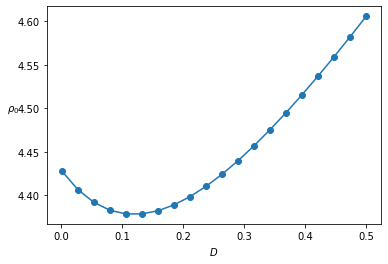

In [998]:
plt.plot(vec_D_low, rho0c_low, 'o-')
plt.xlabel(r'$D$')
plt.ylabel(r'$\rho_0$', rotation=0);

# Simulate HD

## ODEint

In [441]:
def dXdt(X, t, v, D, beta, Nx):
    rho, m = X[:Nx], X[Nx:] 
    
    drho = - v*(np.roll(m, shift=-1)-np.roll(m, shift=1))/2 \
    + D*(np.roll(rho,  shift=-1)+np.roll(rho,  shift=1)-2*rho)
    
    dm = - v*(np.roll(rho, shift=-1)-np.roll(rho, shift=1))/2 \
    + D*(np.roll(m,  shift=-1)+np.roll(m,  shift=1)-2*m)\
    + 2*(beta-1)*m \
    - beta*beta*(1-beta/3)*m*m*m/(rho*rho) 
    
    #+ 2.*rho*np.sinh(beta*m/rho) - 2.*m*np.cosh(beta*m/rho)
    
    #drho[Nx-1], dm[Nx-1] = 0, 0
       
    return(np.concatenate([drho, dm]))

In [446]:
L=100
tmax=100
dt=1e-2
dx=0.1
beta=2
D=1
v=1

Nt=np.int64(tmax/dt)
Nx=np.int64(L/dx)

vec_t=np.arange(0,tmax, dt)
vec_x=np.arange(0,L, dx)

rho_l=1
rho0=6

m_l=rho_l*np.sqrt(2*(beta-1)/(beta*beta*(1-beta/3)))
m0=-m_l*rho0

#rho=np.concatenate([rho_l*np.ones(Nx-1), [rho0]])
#m=np.concatenate([m_l*np.ones(Nx-1), [m0]])

Nx2=np.int64(Nx/2)
rho=np.concatenate([rho_l*np.ones(Nx2-1), [rho0], rho_l*np.ones(Nx-Nx2)])
m=np.concatenate([m_l*np.ones(Nx2-1), [m0], m_l*np.ones(Nx-Nx2)])

X=np.concatenate([rho, m])

In [438]:
sol = odeint(dXdt, X, vec_t, args=(v, D, beta, Nx))

/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


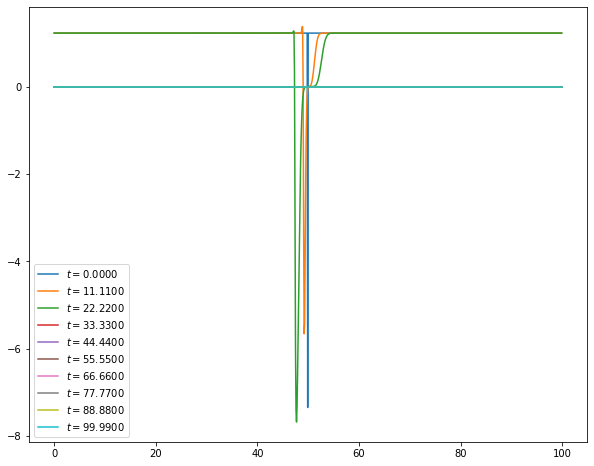

In [439]:
plt.figure(figsize=(10,8))
t0=0
t1=Nt
t_visu=np.int64(np.linspace(t0, t1-1, 10))
for t in t_visu:
    plt.plot(vec_x, (sol[t,Nx:]), '-', 
             label=r'$t=%.4f$'%vec_t[t])

plt.legend()


-8.561807082346412

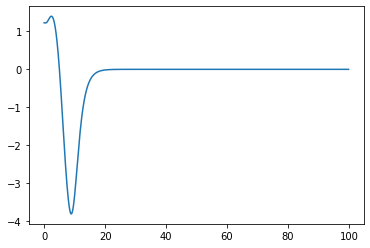

In [436]:
plt.plot(vec_t, sol[:,Nx+Nx2-5])

m0=sol[:,Nx+Nx2-20]  
np.nanmin(0.1*m_l-np.abs(m0-m_l))

## Finite differences

In [449]:
def update_X(X, v, D, beta, dt, dx, Nx):
    rho, m = X[:Nx], X[Nx:] 
    
    drho = rho \
    - v*(dt/dx)*(np.roll(m, shift=-1)-np.roll(m, shift=1))/2 \
     + 0.5*D*(dt/(dx*dx))*(np.roll(rho,  shift=-1)+np.roll(rho,  shift=1)-2*rho)
    
    dm = m  \
    - v*(dt/dx)*(np.roll(rho, shift=-1)-np.roll(rho, shift=1))/2 \
    + 0.5*D*(dt/(dx*dx))*(np.roll(m,  shift=-1)+np.roll(m,  shift=1)-2*m)\
    + 2*dt*(beta-1)*m \
    - dt*beta*beta*(1-beta/3)*m*m*m/(rho*rho) 
    
    #+ 2.*rho*np.sinh(beta*m/rho) - 2.*m*np.cosh(beta*m/rho)
    
    
       
    return(np.concatenate([drho, dm]))

In [498]:
L=20
tmax=10
dt=1e-3
dx=0.2
beta=2
D=1
v=1

Nt=np.int64(tmax/dt)
Nx=np.int64(L/dx)

vec_t=np.arange(0,tmax, dt)
vec_x=np.arange(0,L, dx)

rho_l=1
rho0=40

m_l=rho_l*np.sqrt(2*(beta-1)/(beta*beta*(1-beta/3)))
m0=-m_l*rho0

#rho=np.concatenate([rho_l*np.ones(Nx-1), [rho0]])
#m=np.concatenate([m_l*np.ones(Nx-1), [m0]])

Nx2=np.int64(Nx/2)
rho=np.concatenate([rho_l*np.ones(Nx2-1), [rho0], rho_l*np.ones(Nx-Nx2)])
m=np.concatenate([m_l*np.ones(Nx2-1), [m0], m_l*np.ones(Nx-Nx2)])

X=np.concatenate([rho, m])

In [499]:
prof_rho=[]
prof_m=[]
prof_rho.append(rho.copy())
prof_m.append(m.copy())

for t in vec_t:
    X0=X.copy()
    
    X=update_X(X, v, D, beta, dt, dx, Nx)
    
    rho, m = X[:Nx], X[Nx:]  
    prof_rho.append(rho)
    prof_m.append(m)

/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in multiply
  if sys.path[0] == '':
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in add
  if sys.path[0] == '':
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in add
  


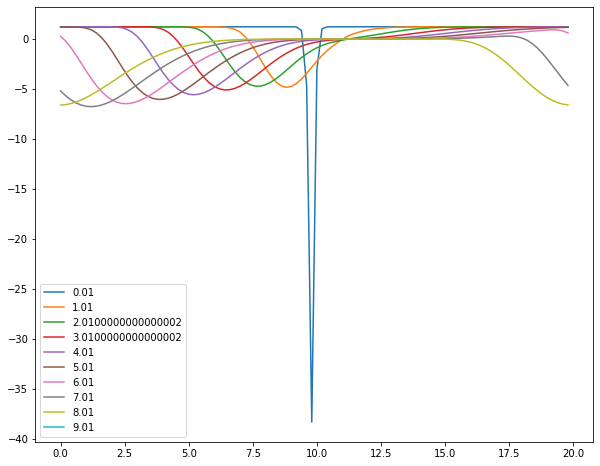

In [501]:
plt.figure(figsize=(10,8))
for t in range(10,10000,1000):
    plt.plot(vec_x, prof_m[t], label=vec_t[t])
    plt.legend()

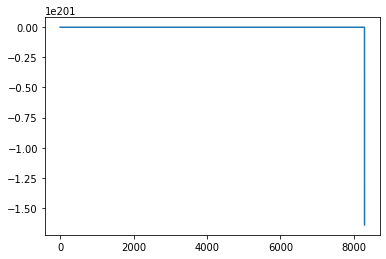

In [502]:
plt.plot(np.sum(np.array(prof_m), axis=1))

In [286]:
def f_m0(rho0, dx, v, beta, D, ):
    dt=1e-3
    dx=2e-1
    tmax=

    Nt=np.int64(tmax/dt)
    Nx=np.int64(L/dx)

    vec_t=np.arange(0,tmax, dt)
    vec_x=np.arange(0,L, dx)

    rho_l=1
    rho0=48

    m_l=rho_l*np.sqrt(2*(beta-1)/(beta*beta*(1-beta/3)))
    m0=-m_l*rho0

    #rho=np.concatenate([rho_l*np.ones(Nx-1), [rho0]])
    #m=np.concatenate([m_l*np.ones(Nx-1), [m0]])

    Nx2=np.int64(Nx/2)
    rho=np.concatenate([rho_l*np.ones(Nx2-1), [rho0], rho_l*np.ones(Nx-Nx2)])
    m=np.concatenate([m_l*np.ones(Nx2-1), [m0], m_l*np.ones(Nx-Nx2)])

    X=np.concatenate([rho, m])
    sol = odeint(dXdt, X, vec_t, args=(v, D, beta, Nx))
    m0=sol[:,0]-sol[:,1]
    
    return(np.nanmin(0.1*m_l-np.abs(m0-m_l)))

In [791]:
f_m0(rho0=1, v=1, beta=2, D=3, m_l=fixed_point(lambda x : np.tanh(2*x), x0=0.5), rho_l=1, L=100)

0.09575040240772688

In [793]:
f_m0(rho0=20, v=1, beta=2, D=3, m_l=fixed_point(lambda x : np.tanh(2*x), x0=0.5), rho_l=1, L=100)

0.09575040240772688

In [6]:
vec_D=np.linspace(0.001, 2, 20)
rho0c=[]

L=100

beta=2
v=1

rho_l=1

m_l=fixed_point(lambda x : np.tanh(beta*x), x0=0.5)

vec_t=np.linspace(0, 100, 100)

for D in vec_D: 
    res=bisect(f_m0, 0.1, 10, args=(v, beta, D, m_l, rho_l, L), xtol=1e-6, rtol=1e-6)
    rho0c.append(res)
    print(D, res)

/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


0.001 4.4277142047882085


/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in double_scalars
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


0.10621052631578948 4.378505754470825
0.21142105263157895 4.398493146896362


/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars


0.31663157894736843 4.457161855697633
0.4218421052631579 4.53757405281067
0.5270526315789473 4.630335569381714
0.6322631578947369 4.7302064418792735
0.7374736842105264 4.834089899063111
0.8426842105263158 4.940125989913941
0.9478947368421052 5.047106218338013
1.0531052631578945 5.154275274276733
1.1583157894736842 5.261123323440552
1.2635263157894736 5.367301034927368
1.368736842105263 5.472591257095337
1.4739473684210527 5.5768429279327405
1.579157894736842 5.679961633682251
1.6843684210526315 5.78190016746521
1.789578947368421 5.882611322402955
1.8947894736842104 5.982095098495484
2.0 6.080351495742798


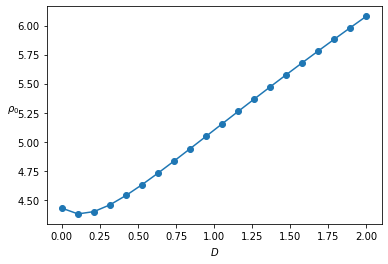

In [7]:
plt.plot(vec_D, rho0c, 'o-')
plt.xlabel(r'$D$')
plt.ylabel(r'$\rho_0$', rotation=0);